**<h1> Credit Card Fraud Detection**
   
In this project,we'll be predicting whether a given transaction with a certain set of features will be resulting in fraud or not.We'll first perform exploratory data analysis and then implement a Machine Learning model on the dataset.

We will be using kaggle’s credit card fraud detection set.It can be found at the below given link:
https://www.kaggle.com/mlg-ulb/creditcardfraud

As per the data provider,the datasets contains transactions made by credit cards in September 2013 by european cardholders.
The dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependent cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


**<h2> Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**<h2>Uploading Dataset**

In [23]:
credit_card_df=pd.read_csv(r"C:\Users\Tarushi Pathak\Desktop\creditcard.csv")

In [24]:
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**<h2>Exploratory Data Analysis**

First we'll check the type of data to ensure there is no data mismatch.

In [25]:
credit_card_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Next,we'll be checking the shape of the dataset

In [26]:
credit_card_df.shape

(284807, 31)

We were informed that the dataset is imbalanced. We'll be checking the number of unique values in the column Class

In [27]:
credit_card_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**<h3>Resampling**
 
Clearly, the above data is imbalanced by a large margin. Hence we'll be resampling  in order to ensure that the model doesn't overfit.
In the next line of code , we'll be seperating transactions with class=1 .


In [28]:
fraud_df=credit_card_df[credit_card_df['Class']==1]
fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [29]:
fraud_df.shape

(492, 31)

Now we'll be seperating data where class=0 into a different dataframe

In [30]:
not_fraud_df=credit_card_df[credit_card_df['Class']==0]
not_fraud_df.shape

(284315, 31)

We'll concatenate the above two dataframes with nearly equal ratios of class=1 and 0 and form our new balanced dataframe : new_credit_card 

In [31]:
new_credit_card=pd.concat([not_fraud_df[:600],fraud_df],axis=0)

In [32]:
new_credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
new_credit_card['Class'].value_counts()

0    600
1    492
Name: Class, dtype: int64

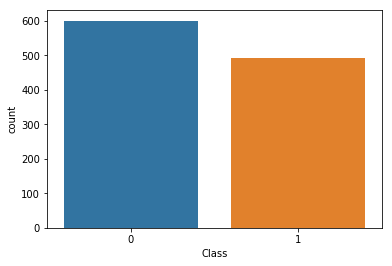

In [36]:
sns.countplot(new_credit_card['Class'])

With a balanced dataset,we'll now move ahead towards exploring the relationships shared by the variables with each other.

In the next line of code we'll be using .describe function to give us the basic statistics related information like count,mean,standard deviation,minimum value,etc.

In [34]:
new_credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,...,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,36499.065934,-2.240921,1.746459,-2.685963,2.226913,-1.409386,-0.513729,-2.447950,0.226069,-1.167445,...,0.324380,-0.050536,-0.042290,-0.043673,0.084461,0.035814,0.089098,0.025130,92.518929,0.450549
std,51349.130864,5.189608,3.459086,6.232101,2.997657,4.025632,1.753336,5.635031,4.611735,2.205887,...,2.656622,1.101422,1.094825,0.585402,0.621282,0.469371,0.955638,0.423981,231.964982,0.497777
min,0.000000,-30.552380,-12.114213,-31.103685,-4.515824,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.243924,-7.263482,-2.733887,0.000000,0.000000
25%,193.750000,-2.409057,0.058778,-4.512043,0.170689,-1.506219,-1.327802,-2.596992,-0.168866,-1.974461,...,-0.176246,-0.529819,-0.225276,-0.411860,-0.219815,-0.291982,-0.042474,-0.049952,1.980000,0.000000
50%,409.000000,-0.721520,0.879951,0.004136,1.276802,-0.348851,-0.486036,-0.296399,0.127753,-0.486140,...,0.053283,-0.043627,-0.050372,0.032357,0.124755,-0.003812,0.058650,0.035487,15.580000,0.000000
75%,65470.750000,0.919608,2.426972,1.076034,3.838856,0.421356,0.248397,0.371688,0.699207,0.144613,...,0.616293,0.419925,0.133951,0.393393,0.450079,0.319807,0.395178,0.197937,82.290000,1.000000
max,170348.000000,2.132386,22.057729,3.772857,12.114672,11.095089,6.474115,5.802537,20.007208,5.436633,...,27.202839,8.361985,5.466230,1.215279,2.208209,3.065576,3.052358,1.779364,3828.040000,1.000000


**<h3>Relation between time and amount using Scatter Plot**

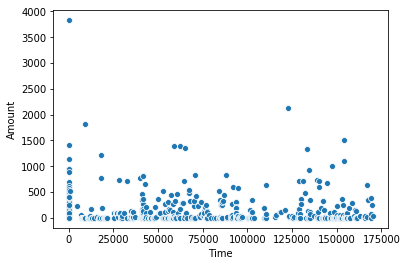

In [35]:
sns.scatterplot(new_credit_card['Time'],new_credit_card['Amount'])

From the above graph , it can be seen that the variables are related to each other non-linearly.

**<h3>Studying Distribution Plot of Amount**

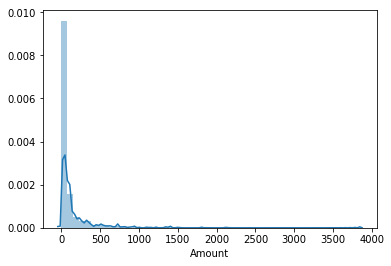

In [37]:
sns.distplot(new_credit_card['Amount'])

**<h3>Studying Distribution plot of Time**

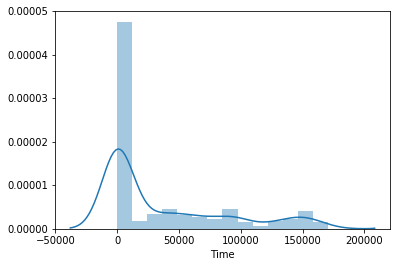

In [38]:
sns.distplot(new_credit_card['Time'])

**<h3>Studying relation between Time and Class**

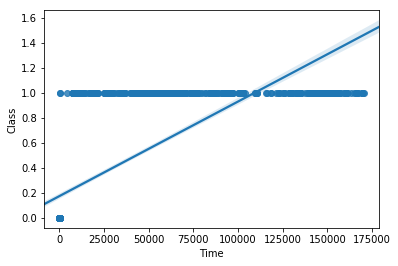

In [39]:
sns.regplot(new_credit_card['Time'],new_credit_card['Class'])

They seem to share positive correlation with each other.

**<h3>Studying relation between Amount and Class**

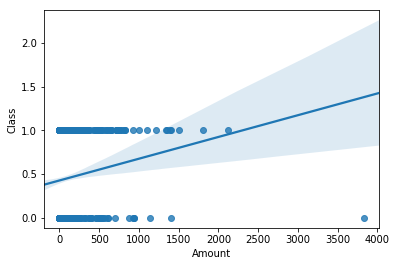

In [40]:
sns.regplot(new_credit_card['Amount'],new_credit_card['Class'])

It also seems to share a positive relation with Amount.

**<h3>Correlation Map**
    
A correlation heatmap is used to study correlation between the given parameters of a dataset.

As shown in this segment , the correlation heatmap seams to be colour themed , with the color bar denoting the colors for the ranges of various correlation constants.Using the color bar we can study the parameters most related to the class variable and eliminate the rest.


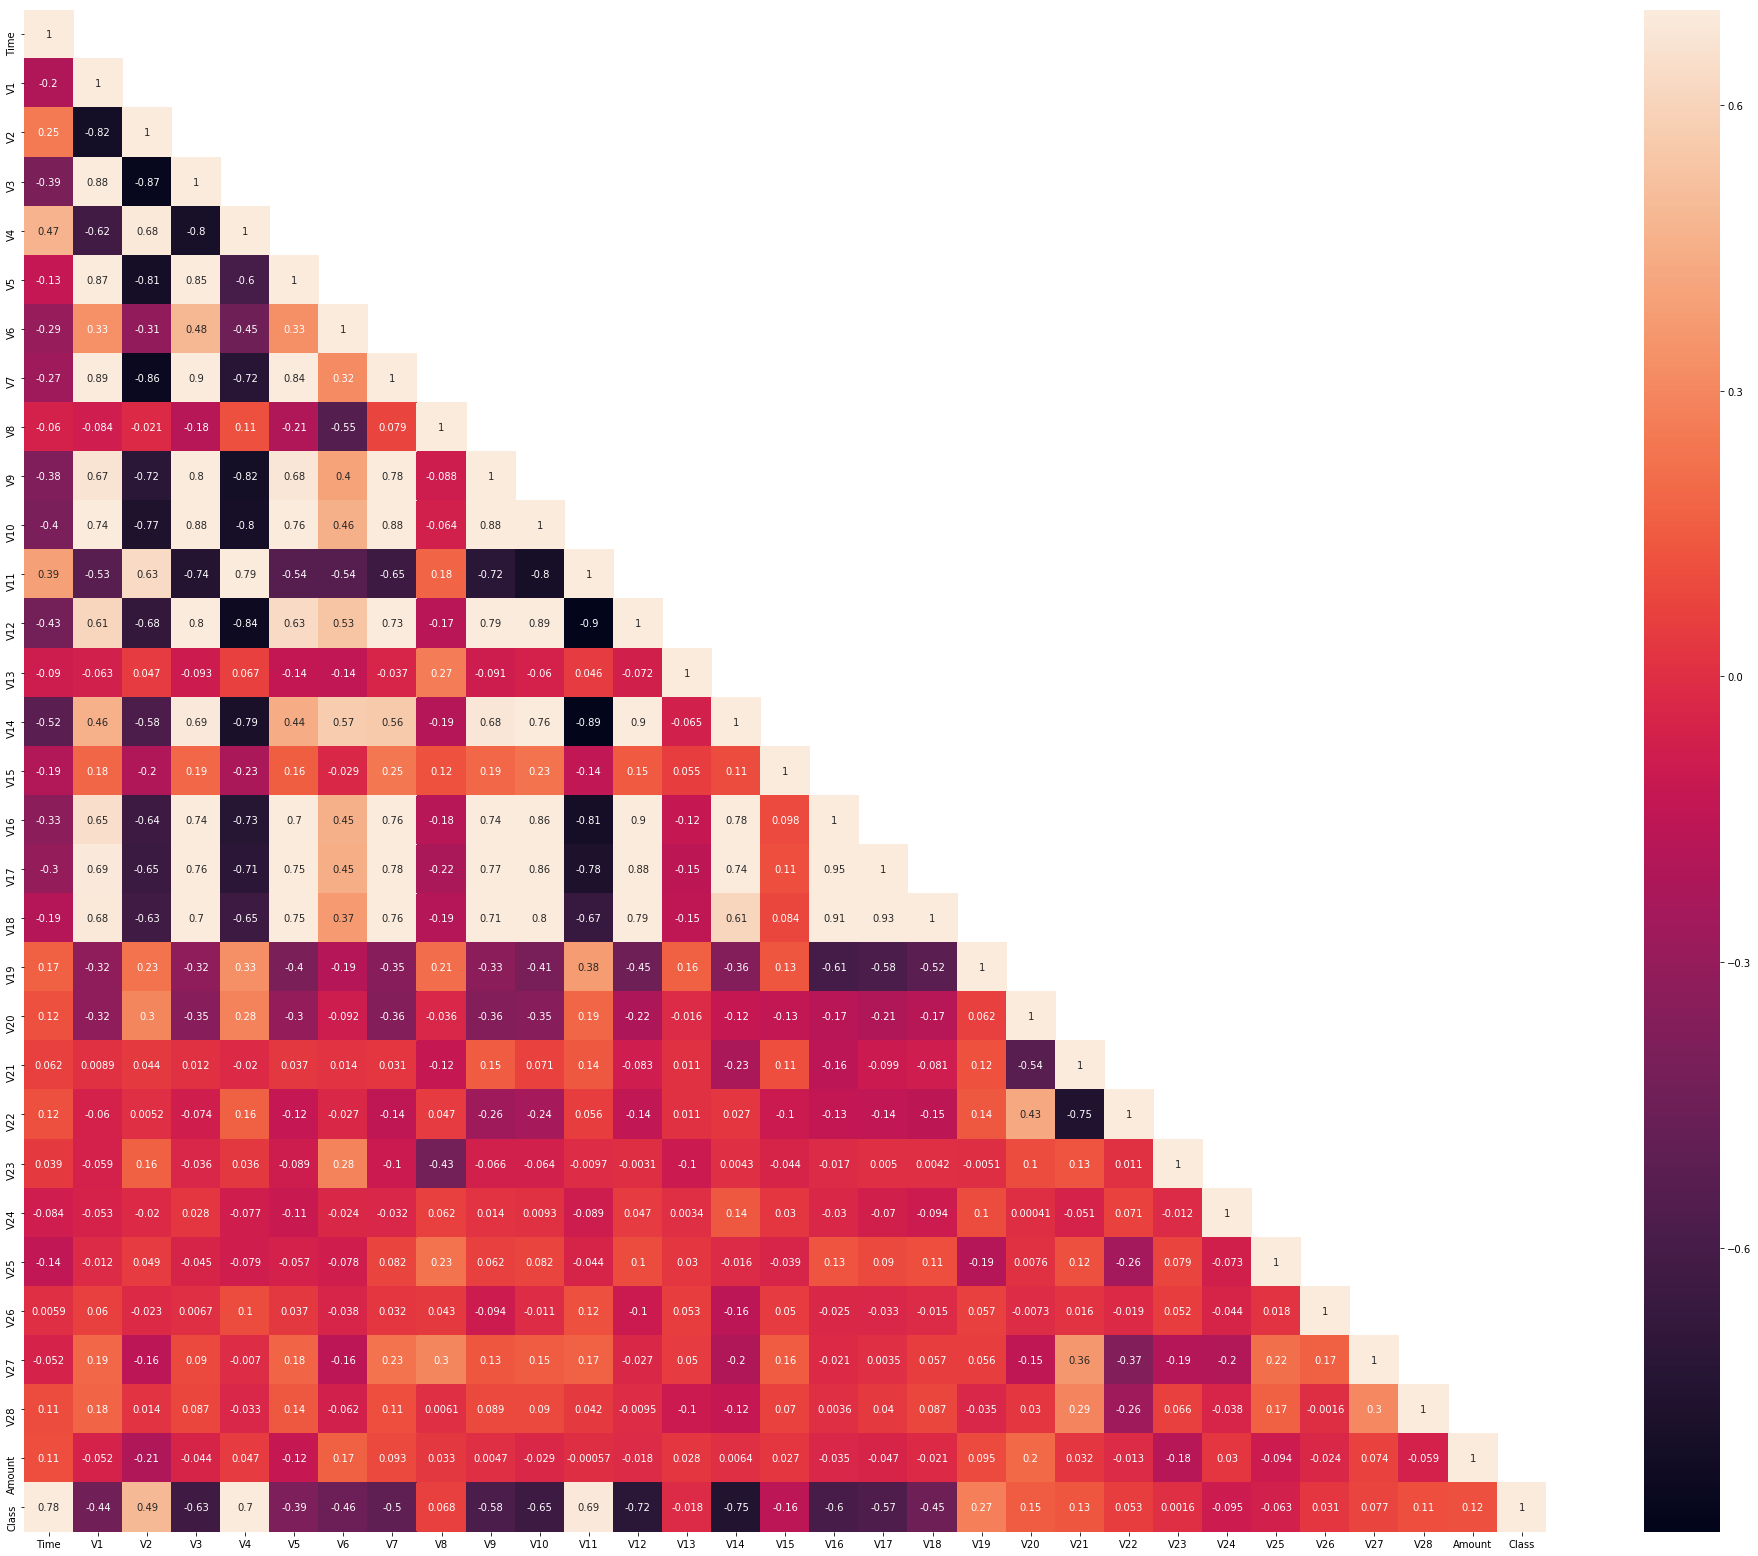

In [41]:
correlation_map = new_credit_card[new_credit_card.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(35,28)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

In [43]:
train=new_credit_card.drop(["Class"],axis=1)
test=new_credit_card["Class"]
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


**<h3>Plotting the correlation with variable Class**
    
We'll be plotting the correlation metrics we got against the class variable to get a better look at each variable's contribution to the Class variable.

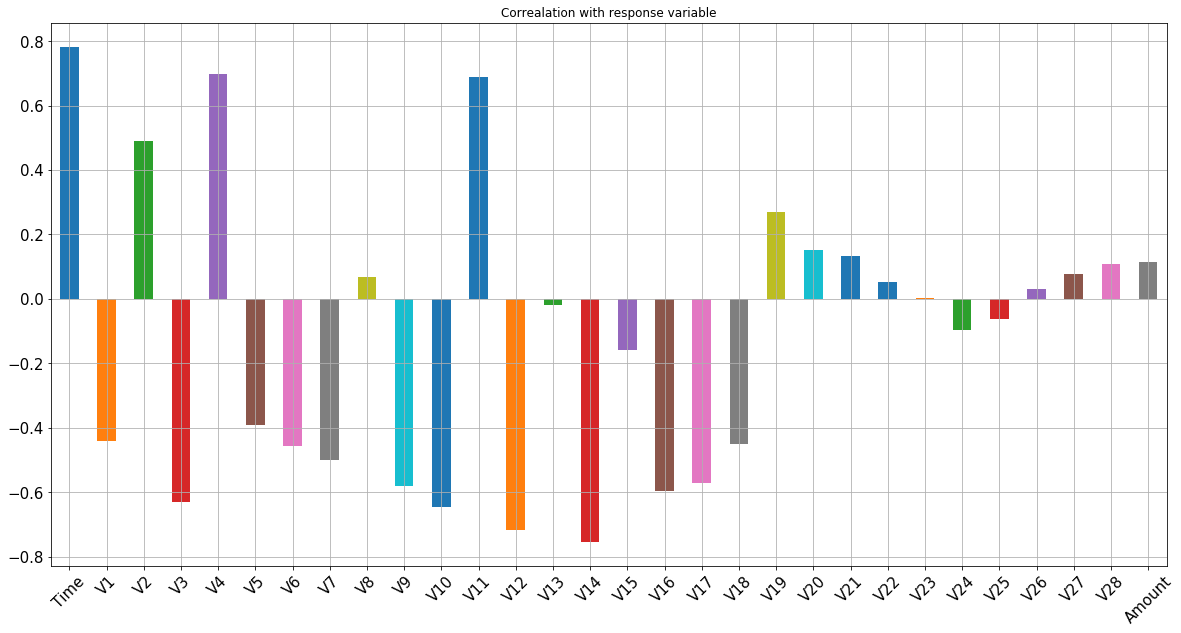

In [44]:
train.corrwith(test).plot.bar(figsize=(20,10),
                                           title="Correalation with response variable",
                                           fontsize=15,rot=45,grid=True)

**<h2>EDA Conclusion**
    
From the above analysis we can conclude that the columns V8,V13,V22,V23,V25,V26 are the least correlated variables with class.We also noticed that Time seems to have the highest positive correlation and V14 the highest negative correlation.
We'll be dropping variables V8,V13,V22,V23,V25 and V26 from the dataset.

In [45]:
new_credit_card.drop(["V8","V13","V22","V23","V25","V26"],axis=1,inplace=True)

In [46]:
new_credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V17,V18,V19,V20,V21,V24,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,...,0.207971,0.025791,0.403993,0.251412,-0.018307,0.066928,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,...,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.339846,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,...,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.689281,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,...,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,-1.175575,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,...,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.141267,0.219422,0.215153,69.99,0


**<h2>Implementing Machine Learning Model**

**Splitting Training and Test Set**

In [47]:
train=new_credit_card.drop(["Class"],axis=1)
test=new_credit_card["Class"]
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V16,V17,V18,V19,V20,V21,V24,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,...,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.066928,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,...,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.339846,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,...,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.689281,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,...,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,-1.175575,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,...,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.141267,0.219422,0.215153,69.99


In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.3,shuffle=True)

In [60]:
x_train.shape[0]==y_train.shape[0]

True

**<h3>Logistic Regression**
    
 
Logistic Regression is the most recommended model for cases dealing with binary categorical variables.Hence we'll be implementing that and then analysis it's performance.

In [61]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Tarushi Pathak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
y_pred=lr.predict(x_test)

The below function will help us calculate the accuracy of the model.

In [69]:
def acc(matrix):
    num=matrix[0][0]+matrix[1][1]
    den=num+matrix[1][0]+matrix[0][1]
    return(num/den)

**<H3>Using Confusion Matrix to Analyse our Results**
    


In [66]:
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[140,  37],
       [  2, 149]], dtype=int64)

In [70]:
print("Accuracy {}".format(acc(cnf_matrix)))

Accuracy 0.8810975609756098


In [73]:
pred_df = pd.DataFrame({'actual' : y_test, 'predicted' : y_pred})
pred_df.sample(20)


,actual,predicted
77,0,0
223572,1,1
148,0,0
30384,1,1
41395,1,1
204064,1,1
407,0,0
493,0,0
469,0,1
49,0,0


**<h1>Conclusion**
    
In this project,we successfully implemented our machine learning model.
We used Logistic Regression and got an accuracy of 88.10%.
From the above analysis we can conclude that the columns V8,V13,V22,V23,V25,V26 are the least correlated variables with class.We also noticed that Time seems to have the highest positive correlation and V14 the highest negative correlation.
